<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />


![image.png](attachment:image.png)

## Table of Content

1. [Introduction to Ensemble Learning](#section1)<br>
    - 1.1 [Implementation of Algorithm Using Python](#section101)<br>
    - 1.2 [Advantages and Disadvantages](#section102)<br>
2. [Use Case : Housing Data](#section2)<br>
3. [Data loading and description](#section3)<br>
4. [Exploratory Data Analysis](#section4)<br>
5. [Modelling and Prediction](#section5)<br>
6. [Conclusion](#section6)

## Introduction

When you want to purchase some new laptop, will you walk up to the first shop and an purchase one based on the advice of the dealer there? It's highly unlikely.![image.png](attachment:image.png) <br/>
- You would __likely browse__ a few __web portals__ where people have posted their reviews and compare different laptop models, checking for their __features__, __speciifcations__ and __prices__.<br>
- You will also probably __ask__ your __friends and colleagues__ for their opinion. <br>
- In short, you wouldn’t directly reach a conclusion, but will instead make a decision __considering the opinions__ of other people as well.

The objective of this notebook is to introduce the concept of __ensemble learning__ and understand the __algorithms__ which use this __technique__.

__Ensemble Learning__ : An ensemble is itself a __supervised learning algorithm__, becuase it can be __trained__ and then used to __make predictions__.![image.png](attachment:image.png)

Another way to think about Ensemble learning is __Fable of blind men and elephant__. 
- All of the blind men had their own description of the elephant. 
- Even though each of the description was true, it would have been better to come together and discuss their undertanding before coming to final conclusion. 
- This story perfectly describes the Ensemble learning method.

__Ensemble Algorithm__ : The _goal_ of ensemble algorithms is to __combine__ the __predictions of several base estimators__ built with a given learning algorithm in order to __improve robustness__ over a single estimator`.

![image.png](attachment:image.png)

There are two families of ensemble methods which are usually distinguished:<br><br>
1. __Averaging Method__ : The driving principle is to build a several estimators independetly and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.<br>
__Examples__: Bagging methods, Forests of randomized trees<br><br>

2. __Boosting Methods__ : Base estimators are built sequentially and one tries to reduce the bias of combined estimator. This motivation is to combine several weak models to produce a powerful ensemble.<br>
__Examples__: AdaBoost, Gradient Tree Boosting

Two most popular ensemble methods are __bagging__ and __boosting__<br><br>
- __Bagging__: Training a bunch of individual models in a __parallel__ way. Each model is trained by a random subset of the data.![image.png](attachment:image.png)

- __Boosting__: Training a bunch of individual models in a __sequential__ way. Each individual model learns from mistakes made by the previous model.![image.png](attachment:image.png)

## Lets dive deep into implementation of algorithm using Python sklearn.
### RANDOM FOREST

__Random forest__ is a model using __bagging__ as the ensemble method and __decision tree as the individual model__.<br>
Let's take a look at the __magic of randomness__

![image.png](attachment:image.png)
Select __n (e.g. 1000) random subsets__ from the training set

![image.png](attachment:image.png)
__Train n (e.g. 1000) decision trees__

- one random subset is used to train one decision tree<br><br>
- the optimal splits for each decision tree are based on a random subset of features (e.g. 10 features in total, randomly select 5 out of 10 features to split)

![image.png](attachment:image.png)<br>
__Each individual tree__ predicts the records/candidates in the test set, independently.

![image.png](attachment:image.png)<br>
 __Make the final prediction__

For each candidate in the test set, Random Forest uses the class (e.g. cat or dog) with the __majority vote__ as this candidate’s final prediction.

Of course, our 1000 trees are the parliament here.

### ADABOOST (ADAPTIVE BOOSTING)

- AdaBoost is a boosting model and works especially well with the decision tree. 
- Boosting model’s key is learning from the previous mistakes, e.g. misclassification data points.

![image.png](attachment:image.png)

__Step 0__: __Initialize the weights__ of data points. if the training set has __100__ data points, then __each point’s__ initial weight should be __1/100 = 0.01__.

__Step 1__: __Train__ a decision tree

__Step 2__: 
- __Calculate the weighted error rate (e)__ of the decision tree. 
- The weighted error rate (e) is just __how many wrong predictions__ out of total and you treat the wrong predictions differently based on its data point’s weight. 
- __The higher the weight, the more the corresponding error will be weighted__ during the calculation of the (e).

__Step 3__: 
- __Calculate this decision tree’s weight__ in the ensemble

- The weight of this tree = learning rate * log( (1 — e) / e)

- The __higher weighted error__ rate of a tree, 😫, the __less decision power__ the tree will be given during the later voting and 😃 vice versa.

__Step 4__: 
- __Update weights__ of wrongly classified points

The weight of each data point =

    - if the model got this data point correct, the weight stays the same
    - if the model got this data point wrong, the new weight of this point = old weight * np.exp(weight of this tree)
__Note__: 
- The __higher the weight__ of the tree (more accurate this tree performs), the __more boost__ (importance) the misclassified data point by this tree will get. 
- The weights of the data points are __normalized after all the misclassified points are updated__.

__Step 5__: __Repeat__ Step 1(until the number of trees we set to train is reached)<br>

__Step 6__: __Make the final prediction__

![image.png](attachment:image.png)<br>

- The tree with __higher weight__ will have __more power of influence__ on the final decision.

### GRADIENT BOOSTING

Boosting model's __key is learning from previous mistakes__.<br><br>
Gradient Boosting learns from the mistake - __residual error directly__, rather than update the weights of data points

Let's see __how Gradient Boosting works__:<br>
![image.png](attachment:image.png)

__Step 1__: 
__Train__ a decision tree

__Step 2__: 
__Apply__ the decision tree just trained to predict

__Step 3__: 
__Calculate__ the residual of this decision tree, Save residual errors as the new y

__Step 4__: 
__Repeat__ Step 1 (until the number of trees we set to train is reached)

__Step 5__: 
__Make the final prediction__

![image.png](attachment:image.png)<br>
The Gradient Boosting makes a __new prediction by simply adding up the predictions__(of all trees).

## Advantages of Ensemble Algorithm:

- Ensemble is a proven method for __improving the accuracy__ of the model and works in most of the cases.

- Ensemble makes the model more __robust__ and __stable__ thus entering decent performance on the test cases in more scenarios.

- You can ensemble to capture __linear__ and simple as well __non-linear__ complex relationships in the data. 
- This can be done by using __two different models__ and forming an __ensemble of two__.

## Disadvantages of Ensemble Algorithm:

- Ensemble __reduce the model interpret-ability__ and makes it very difficult to draw any crucial business insights at the end.

- It is __time-consuming__ and thus might not be the best idea for real-time applications.

- The __selection of models__ for creating an ensemble is an __art__ which is really hard to master

In [0]:
!pip install pydataset

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pydataset import data

# To supress all the warnings
import warnings
warnings.filterwarnings("ignore")

In [0]:
# Get housing dataset ... classic
df = data('Housing')
df.head().values

array([[42000.0, 5850, 3, 1, 2, 'yes', 'no', 'yes', 'no', 'no', 1, 'no'],
       [38500.0, 4000, 2, 1, 1, 'yes', 'no', 'no', 'no', 'no', 0, 'no'],
       [49500.0, 3060, 3, 1, 1, 'yes', 'no', 'no', 'no', 'no', 0, 'no'],
       [60500.0, 6650, 3, 1, 2, 'yes', 'yes', 'no', 'no', 'no', 0, 'no'],
       [61000.0, 6360, 2, 1, 1, 'yes', 'no', 'no', 'no', 'no', 0, 'no']],
      dtype=object)

In [0]:
df.shape

(546, 12)

In [0]:
# Check buckets
for i, j in enumerate(np.unique(pd.qcut(df['price'], 3))):
    print (i, j)

0 (24999.999, 53000.0]
1 (53000.0, 74500.0]
2 (74500.0, 190000.0]


In [0]:
from sklearn.preprocessing import normalize, StandardScaler

# Clean up the dataset a bit
d = dict(zip(['no', 'yes'], range(0,2)))

for i in zip(df.dtypes.index, df.dtypes):
    if str(i[1]) == 'object':
        df[i[0]] = df[i[0]].map(d)

# Bucket our prices
df['price'] = pd.qcut(df['price'], 3, labels=['0', '1', '2']).cat.codes

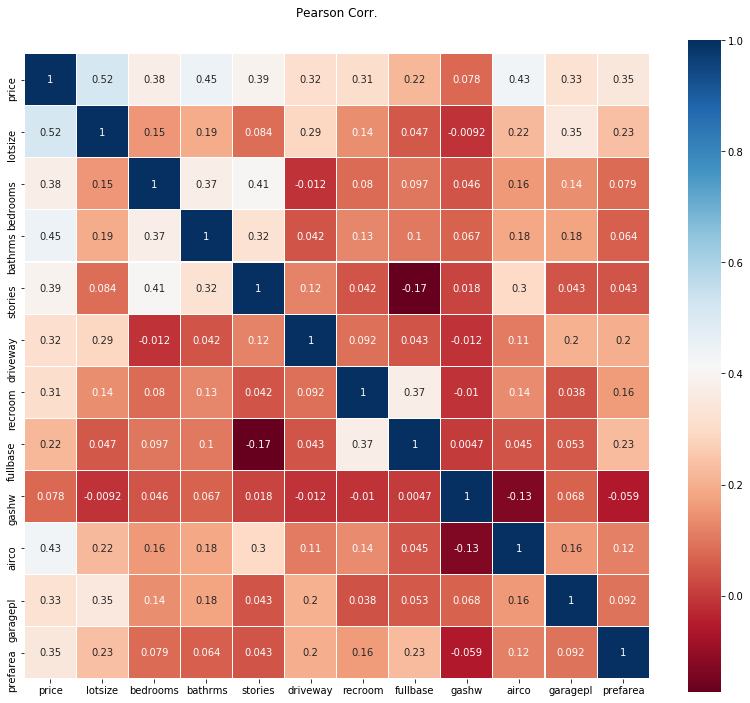

In [0]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Corr.', y=1.05, size=12)
sns.heatmap(df.astype(float).corr(),linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

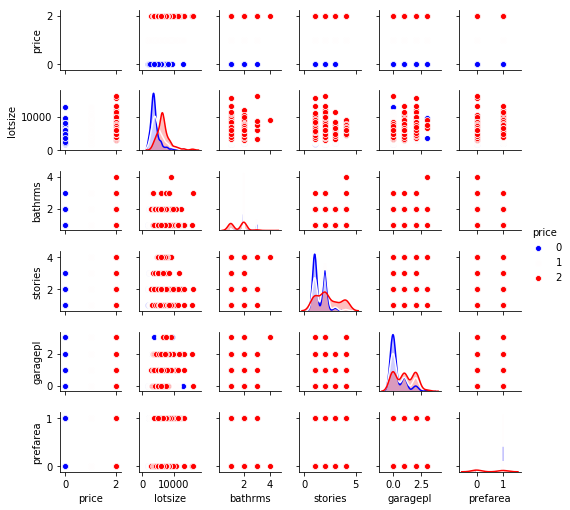

In [0]:
sns.pairplot(df[['price', 'lotsize', 'bathrms', 'stories', 'garagepl', 'prefarea']], 
                 hue='price', palette = 'seismic',size=1.2, diag_kind = 'kde')

In [0]:
# Split up our data
y = df['price'] 
X = df.drop('price', 1)

In [0]:
# Get some classifiers to evaluate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC

seed = 1075
np.random.seed(seed)

# Create classifiers
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()

clf_array = [rf, et, knn, svc, rg]

for clf in clf_array:
    vanilla_scores = cross_val_score(clf, X, y, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, 
       max_samples=0.4, max_features=10, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=10, 
       n_jobs=-1)
    
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__, 
                                                              vanilla_scores.mean(), vanilla_scores.std()))
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__, 
                                                                        bagging_scores.mean(), bagging_scores.std()))
    

Mean of: 0.643, std: (+/-) 0.073 [RandomForestClassifier]
Mean of: 0.639, std: (+/-) 0.069 [Bagging RandomForestClassifier]

Mean of: 0.630, std: (+/-) 0.087 [ExtraTreesClassifier]
Mean of: 0.654, std: (+/-) 0.073 [Bagging ExtraTreesClassifier]

Mean of: 0.500, std: (+/-) 0.086 [KNeighborsClassifier]
Mean of: 0.535, std: (+/-) 0.111 [Bagging KNeighborsClassifier]

Mean of: 0.465, std: (+/-) 0.085 [SVC]
Mean of: 0.535, std: (+/-) 0.083 [Bagging SVC]

Mean of: 0.639, std: (+/-) 0.050 [RidgeClassifier]
Mean of: 0.597, std: (+/-) 0.045 [Bagging RidgeClassifier]



In [0]:
# Set up voting
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), 
                                    ('KNeighbors', knn), ('SVC', svc), ('Ridge Classifier', rg)], voting='hard')

for clf, label in zip([rf, et, knn, svc, rg, eclf], ['Random Forest', 'Extra Trees', 
                                                     'KNeighbors', 'SVC', 'Ridge Classifier', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Mean: 0.619, std: (+/-) 0.078 [Random Forest]
Mean: 0.640, std: (+/-) 0.090 [Extra Trees]
Mean: 0.500, std: (+/-) 0.086 [KNeighbors]
Mean: 0.465, std: (+/-) 0.085 [SVC]
Mean: 0.639, std: (+/-) 0.050 [Ridge Classifier]
Mean: 0.632, std: (+/-) 0.102 [Ensemble]


In [0]:
# Set up ensemble voting for bagging
ebclf_array = []

for clf in clf_array:
    ebclf_array.append(BaggingClassifier(clf, max_samples=0.25, 
                                   max_features=10, random_state=seed))

v_eclf = VotingClassifier(estimators=zip(['Bagging Random Forest', 'Bagging Extra Trees', 'Bagging KNeighbors',
                                          'Bagging SVC', 'Bagging Ridge Classifier', 'Bagging Ensemble'],
                                         ebclf_array), 
                          voting='hard')

ebclf_array.append(v_eclf)

for clf, label in zip(ebclf_array, ['Bagging Random Forest', 'Bagging Extra Trees', 'Bagging KNeighbors',
                              'Bagging SVC', 'BaggingRidge Classifier', 'Bagging Ensemble']):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Mean: 0.661, std: (+/-) 0.099 [Bagging Random Forest]
Mean: 0.650, std: (+/-) 0.082 [Bagging Extra Trees]
Mean: 0.535, std: (+/-) 0.117 [Bagging KNeighbors]
Mean: 0.528, std: (+/-) 0.068 [Bagging SVC]
Mean: 0.604, std: (+/-) 0.046 [BaggingRidge Classifier]


TypeError: object of type 'zip' has no len()

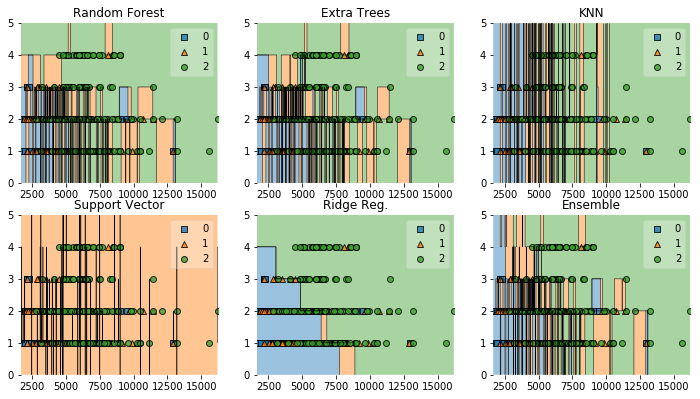

In [0]:
# Now plot the decision regions with only two features
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(12, 10))
labels = ['Random Forest', 'Extra Trees', 'KNN', 'Support Vector',
          'Ridge Reg.', 'Ensemble']

for clf, lab, grd in zip([rf, et, knn, svc, rg, eclf], 
                         labels,
                         itertools.product([0, 1, 2], repeat = 2)):

    clf.fit(X[['lotsize', 'stories']], y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X[['lotsize', 'stories']]), 
                                y=np.array(y), clf=clf)
    plt.title(lab)

In [0]:
from mlxtend.classifier import EnsembleVoteClassifier
import warnings
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

warnings.filterwarnings('ignore')

# Create boosting classifiers
ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = XGBClassifier()

boost_array = [ada_boost, grad_boost, xgb_boost]

eclf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')

labels = ['Ada Boost', 'Grad Boost', 'XG Boost', 'Ensemble']

for clf, label in zip([ada_boost, grad_boost, xgb_boost, eclf], labels):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Mean: 0.641, std: (+/-) 0.082 [Ada Boost]
Mean: 0.656, std: (+/-) 0.115 [Grad Boost]
Mean: 0.663, std: (+/-) 0.101 [XG Boost]
Mean: 0.667, std: (+/-) 0.105 [Ensemble]


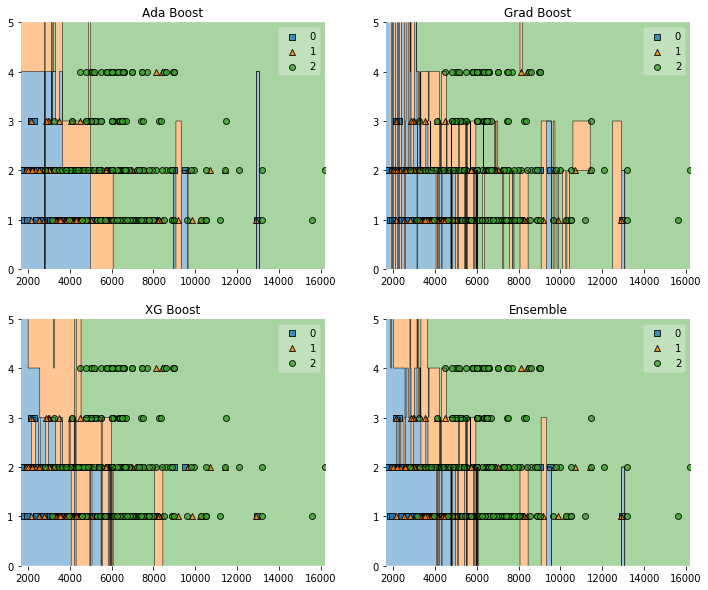

In [0]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(12, 10))

labels = ['Ada Boost', 'Grad Boost', 'XG Boost', 'Ensemble']

for clf, lab, grd in zip([ada_boost, grad_boost, xgb_boost, eclf],
                         labels,
                         itertools.product([0, 1], repeat = 2)):

    clf.fit(X[['lotsize', 'stories']].values, y.values)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X[['lotsize', 'stories']].values), 
                                y=np.array(y.values), clf=clf)
    plt.title(lab)

In [0]:
from mlens.ensemble import SuperLearner
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr = LogisticRegression()

seed = 1075

ensemble = SuperLearner(scorer = accuracy_score, 
                        random_state=seed, 
                        folds=10,
                        verbose = 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

# Build the first layer
ensemble.add([rf, et, knn, rg])
# Attach the final meta estimator
ensemble.add_meta(lr)

ensemble.fit(X_train, y_train)
preds = ensemble.predict(X_test)
print("Fit data:\n%r" % ensemble.data)
print("Accuracy score: {:.3f}").format(accuracy_score(preds, y_test))


Fitting 2 layers


[MLENS] backend: threading


Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Fit data:
                                   score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  extratreesclassifier         0.66     0.09  0.10  0.03  0.01  0.01
layer-1  kneighborsclassifier         0.51     0.07  0.01  0.01  0.01  0.01
layer-1  randomforestclassifier       0.65     0.06  0.10  0.02  0.00  0.00
layer-1  ridgeclassifier              0.65     0.08  0.01  0.00  0.00  0.00

Accuracy score: {:.3f}


AttributeError: 'NoneType' object has no attribute 'format'

In [0]:
from itertools import combinations

names = ['Random Forest', 'Extra Trees', 'KNeighbors', 'SVC', 'Ridge Classifier']

def zip_stacked_classifiers(*args):
    to_zip = []
    for arg in args:
        combined_items = sum([map(list, combinations(arg, i)) for i in range(len(arg) + 1)], [])
        combined_items = filter(lambda x: len(x) > 0, combined_items)
        to_zip.append(combined_items)
    
    return zip(to_zip[0], to_zip[1])

stacked_clf_list = zip_stacked_classifiers(clf_array, names)

best_combination = [0.00, ""]

for clf in stacked_clf_list:
    
    ensemble = SuperLearner(scorer = accuracy_score, 
                            random_state = seed, 
                            folds = 10)
    ensemble.add(clf[0])
    ensemble.add_meta(lr)
    ensemble.fit(X_train, y_train)
    preds = ensemble.predict(X_test)
    accuracy = accuracy_score(preds, y_test)
    
    if accuracy > best_combination[0]:
        best_combination[0] = accuracy
        best_combination[1] = clf[1]
    
    print("Accuracy score: {:.3f} {}").format(accuracy, clf[1])

print("\nBest stacking model is {} with accuracy of: {:.3f}").format(best_combination[1], best_combination[0])

TypeError: can only concatenate list (not "map") to list